In [38]:
import pprint
import sys
import pickle
import pandas as pd
import numpy as np
from time import time
from tester import dump_classifier_and_data

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, chi2

import pylab as pl
from feature_format import featureFormat
from feature_format import targetFeatureSplit

import matplotlib.pyplot as plt

In [39]:
# %load poi_id.py
#!/usr/bin/python
sys.path.append("../tools/")

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [40]:
pprint.pprint (data_dict.keys())
print ("There are ", len(data_dict.keys()), " executives in Enron Dataset.")


['METTS MARK',
 'BAXTER JOHN C',
 'ELLIOTT STEVEN',
 'CORDES WILLIAM R',
 'HANNON KEVIN P',
 'MORDAUNT KRISTINA M',
 'MEYER ROCKFORD G',
 'MCMAHON JEFFREY',
 'HORTON STANLEY C',
 'PIPER GREGORY F',
 'HUMPHREY GENE E',
 'UMANOFF ADAM S',
 'BLACHMAN JEREMY M',
 'SUNDE MARTIN',
 'GIBBS DANA R',
 'LOWRY CHARLES P',
 'COLWELL WESLEY',
 'MULLER MARK S',
 'JACKSON CHARLENE R',
 'WESTFAHL RICHARD K',
 'WALTERS GARETH W',
 'WALLS JR ROBERT H',
 'KITCHEN LOUISE',
 'CHAN RONNIE',
 'BELFER ROBERT',
 'SHANKMAN JEFFREY A',
 'WODRASKA JOHN',
 'BERGSIEKER RICHARD P',
 'URQUHART JOHN A',
 'BIBI PHILIPPE A',
 'RIEKER PAULA H',
 'WHALEY DAVID A',
 'BECK SALLY W',
 'HAUG DAVID L',
 'ECHOLS JOHN B',
 'MENDELSOHN JOHN',
 'HICKERSON GARY J',
 'CLINE KENNETH W',
 'LEWIS RICHARD',
 'HAYES ROBERT E',
 'MCCARTY DANNY J',
 'KOPPER MICHAEL J',
 'LEFF DANIEL P',
 'LAVORATO JOHN J',
 'BERBERIAN DAVID',
 'DETMERING TIMOTHY J',
 'WAKEHAM JOHN',
 'POWERS WILLIAM',
 'GOLD JOSEPH',
 'BANNANTINE JAMES M',
 'DUNCAN JOHN H'

## Task 1: Select what features you'll use.
features_list is a list of strings, each of which is a feature name.<br>
The first feature must be "poi".<br>
You will need to use more features

In [41]:
### Task 1: Select what features you'll use.

features_list = ['poi',
                 'salary',
                 'deferral_payments',
                 'total_payments',
                 'loan_advances',
                 'bonus',
                 'restricted_stock_deferred',
                 'bonus_salary_R',
                 'restricted_stock_deferred',
                 'deferred_income',
                 'total_stock_value',
                 'expenses',
                 'exercised_stock_options',
                 'other',
                 'long_term_incentive',
                 'restricted_stock',
                 'director_fees',
                 'to_messages',
                 'from_poi_to_this_person',
                 'from_poi_to_this_person_Percent',                 
                 'from_messages',
                 'from_this_person_to_poi',
                 'from_this_person_to_poi_percent',
                 'shared_receipt_with_poi']


## Task 2: Remove outliers
based on mini-project in outlier lessons, i know there is a key "Total", which holds the total value for all other values. <br>
Another one is the key "THE TRAVEL AGENCY IN THE PARK".<br>
I'm going to exclude both of them



In [42]:
pprint.pprint (data_dict["TOTAL"], width=1)
pprint.pprint (data_dict["THE TRAVEL AGENCY IN THE PARK"])

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}
{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restri

In [43]:
data_dict.pop("TOTAL")
data_dict.pop("THE TRAVEL AGENCY IN THE PARK")

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

# Task 3: Create new feature(s)
Store to my_dataset for easy export below.

In [44]:
for key, value in data_dict.iteritems():
    if value['bonus'] == "NaN" or value['salary'] == "Nan":
        value['bonus_salary_R'] = "NaN"
    else:
        value['bonus_salary_R'] = float(value['bonus']) / float(value['salary'])

for key, value in data_dict.iteritems():
    if value["from_this_person_to_poi"] == "NaN" or value["to_messages"] == "Nan":
        value['from_this_person_to_poi_percent'] = "NaN"
    else:
        value['from_this_person_to_poi_percent'] = float(value['from_this_person_to_poi'])*100 / float(value['to_messages'])

for key, value in data_dict.iteritems():
    if value["from_poi_to_this_person"] == "NaN" or value["to_messages"] == "Nan":
        value['from_poi_to_this_person_Percent'] = "NaN"
    else:
        value['from_poi_to_this_person_Percent'] = float(value['from_poi_to_this_person'])*100 / float(value['to_messages'])

In [45]:
my_dataset = data_dict
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [46]:
df = pd.DataFrame.from_dict(my_dataset, orient = 'index')
df = df[features_list]
df = df.replace('NaN', np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 24 columns):
poi                                144 non-null bool
salary                             94 non-null float64
deferral_payments                  38 non-null float64
total_payments                     123 non-null float64
loan_advances                      3 non-null float64
bonus                              81 non-null float64
restricted_stock_deferred          17 non-null float64
bonus_salary_R                     81 non-null float64
restricted_stock_deferred          17 non-null float64
deferred_income                    48 non-null float64
total_stock_value                  125 non-null float64
expenses                           94 non-null float64
exercised_stock_options            101 non-null float64
other                              91 non-null float64
long_term_incentive                65 non-null float64
restricted_stock                   109 non-null float64

# Task 4: Try a varity of classifiers
Please name your classifier clf for easy export below.
Note that if you want to do PCA or other multi-stage operations,
you'll need to use Pipelines. For more info:
http://scikit-learn.org/stable/modules/pipeline.html

In [47]:
# Provided to give you a starting point. Try a variety of classifiers.

data = featureFormat(my_dataset, features_list)
labels, features = targetFeatureSplit(data)
features_train, features_test, labels_train, labels_test = train_test_split(features, labels,  test_size=0.3, random_state=42)


# Data Prep

## Feature Scaling 

In [11]:
#minmax scaler
scaler = MinMaxScaler()
scaled_feature_train = scaler.fit_transform(features_train)
scaled_feature_test = scaler.fit_transform(features_test)

# Algorithms

## Grid Search Function

In [17]:

def GridSearch (classifier, score_type, name):
    pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', classifier)
    ])
    N_FEATURES_OPTIONS = [5,10,15,20]
    param_grid = [
        {
            'reduce_dim': [PCA(iterated_power=7, random_state=42)],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [SelectKBest(chi2)],
            'reduce_dim__k': N_FEATURES_OPTIONS
        },
    ]
    reducer_labels = ['PCA',  'KBest(chi2)']
    grid = GridSearchCV(pipe, cv=5, param_grid=param_grid,  scoring = score_type)
    grid.fit(scaled_feature_train, labels_train)
    clf_grid = grid.best_estimator_
    print (grid.best_params_)
    mean_scores = np.array(grid.cv_results_['mean_test_score'])
    
    mean_scores = mean_scores.reshape(1, -1, len(N_FEATURES_OPTIONS))
    mean_scores = mean_scores.max(axis=0)
    print (mean_scores)

    bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
                   (len(reducer_labels) + 1) + .5)

    plt.figure()
    COLORS = ['g', 'r']
    for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
        plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

    plt.title("PCA vs. KBest")
    plt.xlabel('Number of features')
    plt.xticks(bar_offsets + len(reducer_labels)/3, N_FEATURES_OPTIONS)
    plt.ylabel(name)
    plt.ylim((0, 1))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return plt.show()




## Naive Bayes


/Users/Haleh/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


{'reduce_dim': SelectKBest(k=20, score_func=<function chi2 at 0x118900938>), 'reduce_dim__k': 20}
[[ 0.   0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.2]]


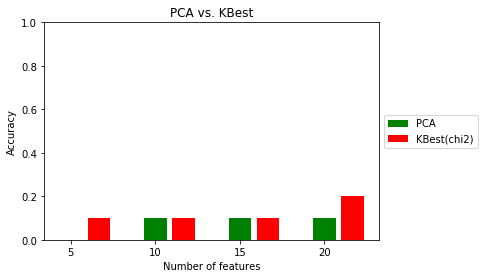

{'reduce_dim': SelectKBest(k=20, score_func=<function chi2 at 0x118900938>), 'reduce_dim__k': 20}
[[ 0.   0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.2]]


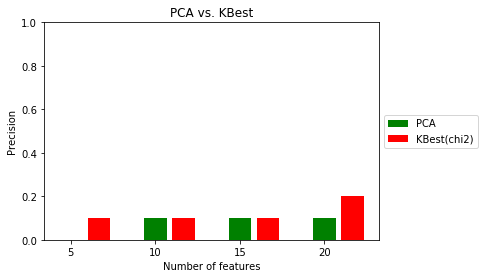

{'reduce_dim': PCA(copy=True, iterated_power=7, n_components=10, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False), 'reduce_dim__n_components': 10}
[[ 0.   0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1]]


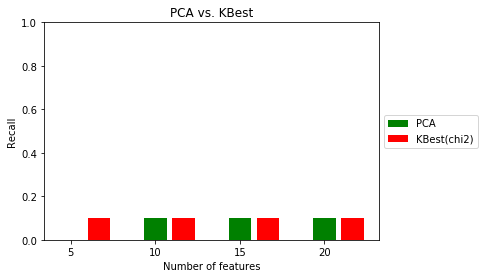

In [18]:
#Naive Bayes
classifier =LinearSVC()
GridSearch (classifier, 'precision', 'Accuracy')
GridSearch (classifier, 'precision', 'Precision')
GridSearch (classifier, 'recall', 'Recall')

## Support Vector Machine (SVM)


{'reduce_dim': PCA(copy=True, iterated_power=7, n_components=10, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False), 'reduce_dim__n_components': 10}
[[ 0.   0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1]]


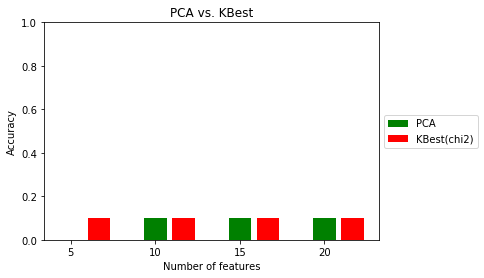

None
{'reduce_dim': PCA(copy=True, iterated_power=7, n_components=10, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False), 'reduce_dim__n_components': 10}
[[ 0.   0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1]]


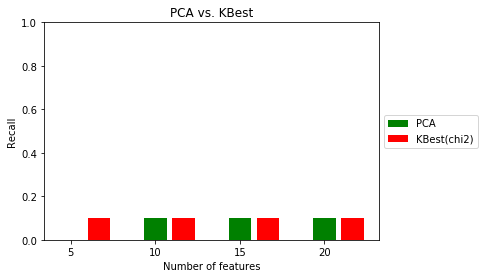

None
{'reduce_dim': SelectKBest(k=20, score_func=<function chi2 at 0x115c9da28>), 'reduce_dim__k': 20}
[[ 0.   0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.2]]


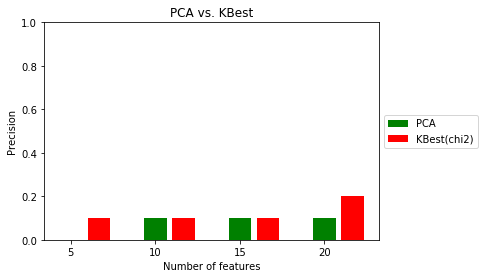

None


In [14]:
classifier = LinearSVC()

print (GridSearch (classifier,'recall',  'Accuracy'))
print (GridSearch (classifier,'recall',  'Recall'))
print (GridSearch (classifier,'precision', 'Precision'))


## Decision Trees

{'reduce_dim': PCA(copy=True, iterated_power=7, n_components=20, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False), 'reduce_dim__n_components': 20}
[[ 0.1    0.17   0.2    0.495]
 [ 0.265  0.17   0.2    0.435]]


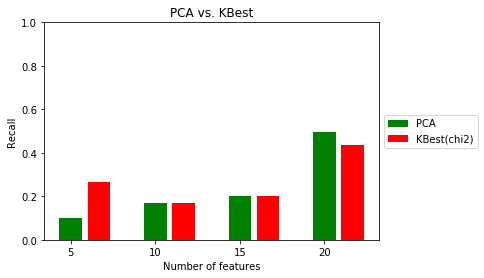

None
{'reduce_dim': SelectKBest(k=20, score_func=<function chi2 at 0x115c9da28>), 'reduce_dim__k': 20}
[[ 0.06666667  0.2525      0.13333333  0.30166667]
 [ 0.32333333  0.13357143  0.2         0.40666667]]


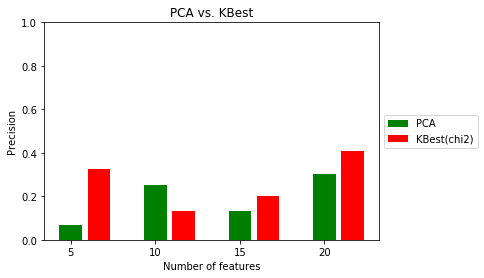

None


In [15]:

classifier = DecisionTreeClassifier(splitter='random', random_state=42)

# print (GridSearch (classifier,'recall',  'Accuracy'))
print (GridSearch (classifier,'recall',  'Recall'))
print (GridSearch (classifier,'precision', 'Precision'))

## Tune the Classifier 

In [ ]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. 

#Creat the pipeline
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=100, random_state = 42)
pipe = Pipeline([
    ('reduce_dim', SelectKBest()),
    ('scaling', MinMaxScaler()),
    ('classify', DecisionTreeClassifier(splitter='best', random_state=42))
])
param_grid_DT = [
    {
        'reduce_dim': [SelectKBest()],
        'reduce_dim__k': [5,10,15,20],
        'classify__criterion':['gini', 'entropy'],
        'classify__class_weight':[None, 'balanced'],
        'classify__min_samples_split' : [2,3,4,5],
        'classify__max_leaf_nodes': [None, 5],
        'classify__min_samples_leaf': [4, 2]
    },
]

#             max_depth=None, max_features=None, max_leaf_nodes=None,
#             min_impurity_split=1e-07,  min_weight_fraction_leaf=0.0,
#             presort=False

#gridsearch
grid = GridSearchCV(pipe, cv=sss, param_grid=param_grid_DT, scoring='f1')
gs = grid.fit(features_train, labels_train)
clf =gs.best_estimator_

# print clf    
    
# #print the selected features:
# mask = (select.get_support())
# new_features = [] 
# for bool, feature in zip(mask, features_list):
#     if bool:
#         new_features.append(feature)
# print new_features

#evaluation
# labels_predictions = grid.predict(scaled_feature_test)
# gbe = grid.best_estimator_
# print ("Best parameters are: ", clf)
# pred = clf.predict(scaled_feature_test)
# acc= accuracy_score(pred, labels_test)
# print ("Accuracy is:",acc)
# print ( "Recall is:",  metrics.recall_score(labels_test, pred))
# print ( "Precision is:", metrics.precision_score(labels_test, pred))


## GridSearchCV

In [ ]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)
from tester import dump_classifier_and_data, test_classifier
test_classifier(clf, my_dataset, features_list)